# Intro To Machine Learning

![regresion-lineal](regresion-lineal.gif )

## Linear Regression Python Tutorial

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw_data = pd.read_csv('linear.csv') #El dataset se encuentra en github
print("Las dimensiones del dataset son {}".format(raw_data.shape))
raw_data.head(8)

Las dimensiones del dataset son (100, 2)


,x,y
0,82.583220,134.907414
1,73.922466,134.085180
2,34.887445,NaN
3,61.839983,114.530638
4,16.775940,31.376437
5,0.016737,8.764634
6,44.457646,73.285341
7,10.344909,18.859865


1) Preprocess the data to remove any points with a missing y value

In [3]:
filtered_data = raw_data[~np.isnan(raw_data["y"])] #removes rows with NaN in them
print("Las dimensiones del nuevo dataset son {}".format(filtered_data.shape))
filtered_data.head(16)

Las dimensiones del nuevo dataset son (92, 2)


,x,y
0,82.583220,134.907414
1,73.922466,134.085180
3,61.839983,114.530638
4,16.775940,31.376437
5,0.016737,8.764634
6,44.457646,73.285341
7,10.344909,18.859865
8,42.767132,72.946609
9,20.856638,28.637286
10,16.829055,27.184138


2) Fit a linear regression model using sklearn's LinearRegression package

In [4]:
npMatrix = np.matrix(filtered_data)
X, Y = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(X,Y) # either this or the next line
#mdl = LinearRegression().fit(filtered_data[['x']],filtered_data.y)
m = mdl.coef_[0]
b = mdl.intercept_
print ("""formula: 
    y = mx + b
    y = {0}x + {1}""".format(m, b)) # following slope intercept form

formula: 
    y = mx + b
    y = [ 1.5831968]x + [ 4.4701969]


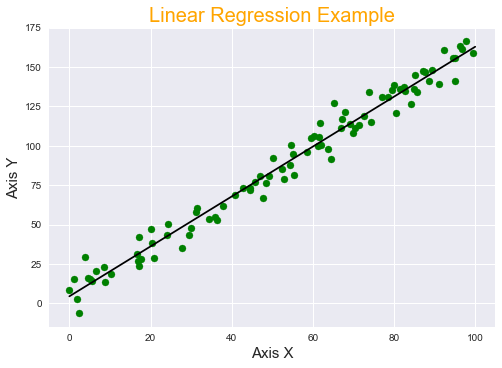

In [5]:
plt.scatter(X,Y, color='green')
plt.plot([0,100],[b,m*100+b],'r', color='black')
plt.title('Linear Regression Example', fontsize = 20, color='orange')
plt.xlabel('Axis X', fontsize = 15)
plt.ylabel('Axis Y', fontsize = 15)
plt.show()

*Para mas documentacion los sgtes links *

https://www.youtube.com/watch?v=dSYJVbj4Eew

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Python_Basics/Linear_Regression/Linear_Regression_Python.ipynb

## O con Seaborn

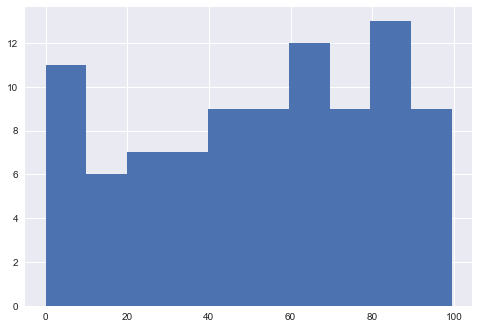

In [6]:
#Histogram de la columna x 
#en donde el eje y es la cantidad de veces que se repite el dato
#Lo que se puede leer como los valores en el rango de 0 a 5 se repiten
#alrededor de 11 veces
filtered_data['x'].hist()

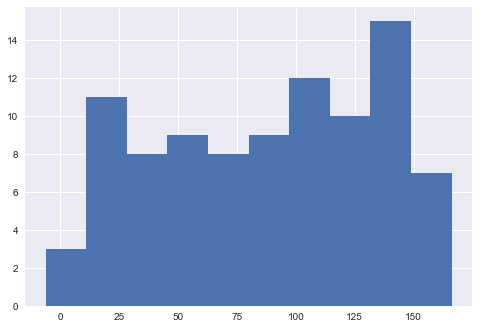

In [7]:
#Histogram de la columna y 
#en donde el eje y es la cantidad de veces que se repite el dato
#Lo que se puede leer como los valores en el rango de 0 a 13 se repiten
#alrededor de 3 veces
filtered_data['y'].hist()

C:\Users\Beatsaudio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


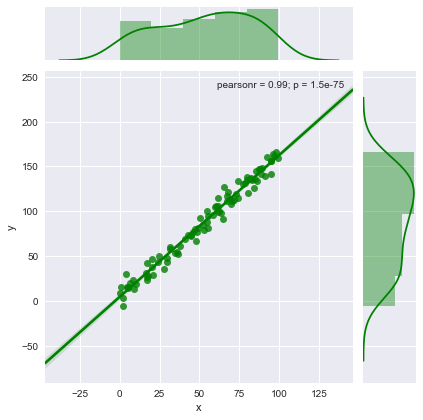

In [8]:
#Regresion Lineal
sns.jointplot(x='x', y='y', data=filtered_data, kind='reg', color="g")

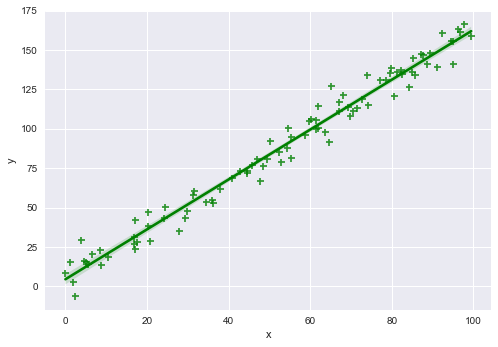

In [9]:
sns.regplot(x='x', y='y', data=filtered_data, color="g", marker="+", truncate=True) 
#Solo la regresion sin histogram

## Ejercicio Regresion Lineal

Tenemos los metros cuadrados de 4 casas y sus precios, ahora vamos a calcular la pendiente y la intersección para así predecir el precio de una casa 35 metros cuadrados usando el algoritmo de **Regresión Lineal**.

**n** = Cantidad de casas

**X** = Metros

**t** = Precios

![tablaRegresionLineal](tablaRegresionLineal.png)



In [8]:
from colorama import init, Fore, Back, Style #Libreria de colores y stilos de print
from IPython.display import clear_output
import os
b_x = []
b_t = []
def clear(): #Funcion para limpiar las diferentes pantallas
    if os.name == "nt": # Windows
        os.system("cls")
    elif os.name == "posix": # Linux / Mac
        os.system("clear")
    clear_output(wait=True) #Jupyter
def tablaRegistros(): #Funcion para mostrar tabla de registros
            print(Fore.BLUE+"Los datos ingresados son\n")
            print(Fore.YELLOW+"M²\tPrecio")
            for i in range(len(b_t)):
                print(Fore.GREEN+"{}\t{}".format(b_x[i],b_t[i]))
while(True): #MENU
    print(Fore.CYAN+"\nBienvenido a compucasas.")
    opcion = int(input("""\nMenu, digite un numero:
    1)Deseo ingresar los datos.
    2)Imprimir los datos.
    3)Deseo predecir el valor de una casa.
    99)Salir\n"""))
    if opcion == 1: #INGRESO DE DATOS
        while(True):
            print(Fore.GREEN+"Registro de datos")
            x = input("Introduzca el numero de m²:\n")
            if x.isdigit() and x != '0':
                b_x.append(x)
                clear()
                print(Fore.GREEN+"El valor que introduciste es {}m² \n".format(x))
                break
            else:
                clear()
                print(Fore.RED+"\nEl dato introducido no es un numero o es 0, {}\n".format(x))
        while(True):
            print(Fore.GREEN+"Registro de datos")
            t = input("Introduzca el precio por piso:\n")
            if t.isdigit() and t != '0':
                b_t.append(t)
                clear()
                print(Fore.GREEN+"El valor que introduciste es {} pesos \n".format(t))
                break
            else:
                clear()
                print(Fore.RED+"\nEl dato introducido no es un numero o es 0, {}\n".format(t))
        print ("¡Datos registrados!")
    elif opcion == 2: #MUESTRA TABLA DE REGISTROS
        tablaRegistros()
        input("Enter para continuar\n")
        clear()
    elif opcion == 3: #PRONOSTICO
        while(True):
            print(Fore.GREEN+'\nPronostico :)')
            f = input("Pronostica el valor del piso para este numero de m²:\n")
            if f.isdigit() and f != '0':
                forecast = f
                clear()
                print(Fore.GREEN+"El valor que introduciste es {} \n".format(forecast))
                input("Enter para continuar\n")
                clear()
                break
            else:
                clear()
                print(Fore.RED+"\nEl dato introducido no es un numero o es 0, {}\n".format(f))
    elif opcion == 99: #SALIR
        print (Fore.RED+"Hasta la vista baby. ಠ_ಠ")
        break
    else: #OPCION INCORRECTA
        clear()
        print("Opcion incorrecta, digite otra porfavor.")
        


Bienvenido a compucasas.

Menu, digite un numero:
    1)Deseo ingresar los datos.
    2)Imprimir los datos.
    3)Deseo predecir el valor de una casa.
    99)Salir
99
Hasta la vista baby. ಠ_ಠ
